# Exercise 6.2 - Exploring Relationships

## This script contains:
###    1. Importing libraries & Dataset using path
###    2. Confirm cleaned data 
###    3. Explore realtionships
####        - Correlations
####        - Scatterplots
####        - Pair Plots
####        - Cactegorical Plots
###    4. Answer Research Questions & Hypothesis

## -

### 1. Importing libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.10.6'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Create path
path = r'/Users/puneet/Desktop/Chocolate Bar Analysis 09-2025'

In [5]:
#Import dataset
df = pd.read_csv(os.path.join(path, '02-Data','Prepared Data Files','flavors_of_cacao_cleaned.csv'))

## -

### 2. Confirm cleaned data

In [6]:
#Quick check of dataframe head
df.head()

,Unnamed: 0,Company,Bar_Name,Reference_Number,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


In [7]:
# Drop unnamed column
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
# Check new head of dataframe
df.head()

,Company,Bar_Name,Reference_Number,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


In [9]:
# Check shape of dataframe
df.shape

(1795, 9)

In [10]:
#Check dataframe columns
df.columns

Index(['Company', 'Bar_Name', 'Reference_Number', 'Review_Date',
       'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type',
       'Bean_Origin'],
      dtype='object')

In [11]:
#Check data types of columns
df.dtypes

Company              object
Bar_Name             object
Reference_Number      int64
Review_Date           int64
Cocoa_Percentage    float64
Company_Location     object
Rating              float64
Bean_Type            object
Bean_Origin          object
dtype: object

In [12]:
#Check missing values
df.isnull().sum()

Company             0
Bar_Name            0
Reference_Number    0
Review_Date         0
Cocoa_Percentage    0
Company_Location    0
Rating              0
Bean_Type           1
Bean_Origin         1
dtype: int64

In [13]:
# Replace Unknown values with 'Unknown'
df = df.fillna('Unknown')

In [14]:
#Check missing values again
df.isnull().sum()

Company             0
Bar_Name            0
Reference_Number    0
Review_Date         0
Cocoa_Percentage    0
Company_Location    0
Rating              0
Bean_Type           0
Bean_Origin         0
dtype: int64

*No more null/missing values*

In [15]:
#Check for duplicates
df_dups = df[df.duplicated()]
df_dups.shape

(0, 9)

*No duplicates*

## -

### 3. Exploring Relationships

#### Correlations:

In [16]:
# Create subset dataframe with selected numerical columns for correlations
df_selected = df[['Reference_Number','Review_Date','Cocoa_Percentage','Rating']]

In [17]:
#Check correlations table of subset dataframe
df_selected.corr()

,Reference_Number,Review_Date,Cocoa_Percentage,Rating
Reference_Number,1.000000,0.985076,0.037791,0.101030
Review_Date,0.985076,1.000000,0.038177,0.099846
Cocoa_Percentage,0.037791,0.038177,1.000000,-0.164820
Rating,0.101030,0.099846,-0.164820,1.000000


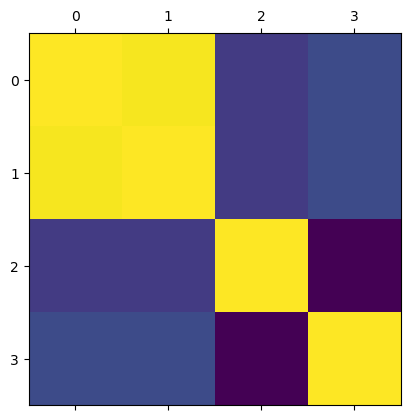

In [18]:
#Create Correlation heatmap using matplotlib
plt.matshow(df_selected.corr())
plt.show()

In [20]:
f = cbr_matrix

Text(0.5, 1.0, 'Correlation Matrix')

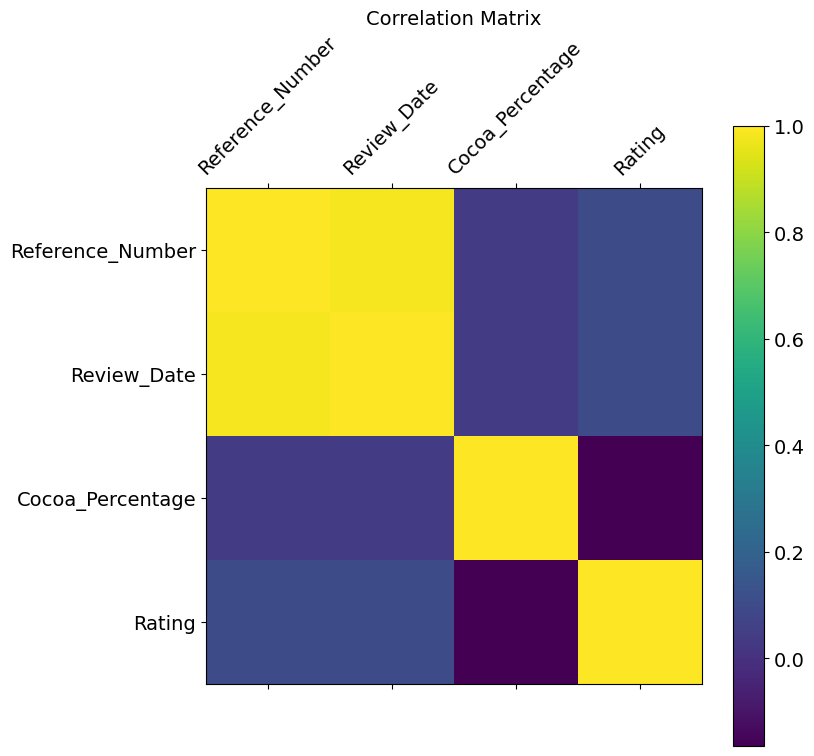

In [21]:
# Add labels, legends and size of heatmap
cbr_matrix = plt.figure(figsize = (8,8)) #figure size
plt.matshow(df_selected.corr(), fignum = f.number) #type of plot
plt.xticks(range(df_selected.shape[1]), df_selected.columns, fontsize=14, rotation=45) #x axis labels
plt.yticks(range(df_selected.shape[1]), df_selected.columns, fontsize=14) #y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [22]:
#Save correlation matrix image
cbr_matrix.figure.savefig(os.path.join(path,'04-Analysis','Data Visualizations','correlation_matrix_fig1.png'),dpi=300, bbox_inches='tight')

### -

#### Correlation Heatmap using seaborn:

In [23]:
#Subset dataframe for correlations heatmap (same as above)
df_selected.head()

,Reference_Number,Review_Date,Cocoa_Percentage,Rating
0,1876,2016,63.0,3.75
1,1676,2015,70.0,2.75
2,1676,2015,70.0,3.00
3,1680,2015,70.0,3.50
4,1704,2015,70.0,3.50


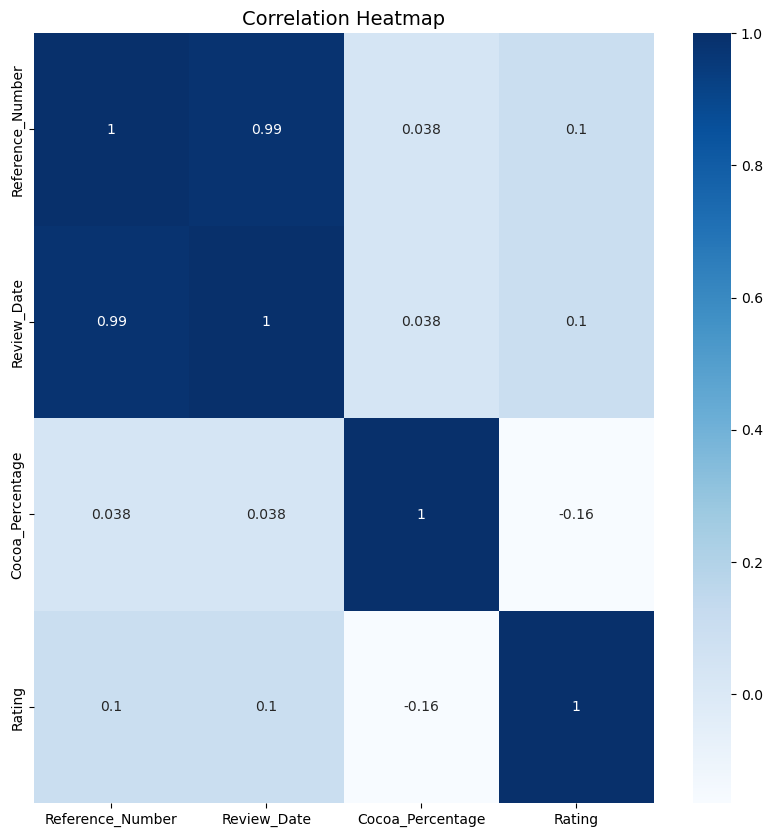

In [24]:
#Create a subbplot
f, ax = plt.subplots(figsize = (10,10))

# Create correlation heatmap using numerical subset dataframe
corr_hm = sns.heatmap(df_selected.corr(), annot = True, ax = ax, cmap = 'Blues') 
#'annot' argument annotates values on heatmap
#cmap changes colors of heatmap

#Add title
plt.title('Correlation Heatmap', fontsize = 14)

#Save image
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations', 'seaborn_correlation_heatmap.png'), dpi=300, bbox_inches='tight')
#last part of argument saves image to fit

### Correlation Heatmap Analysis: 

#### - There is a weak negative correlation between cocoa percetnage and rating, meaning the higher the rating, the lower the cocoa    ####   percentage, or the higher the cocoa percentage, the lower the rating
#### - Other variables show weak correlations and not many be applicable in any further analysis

## -

### Scatterplots using Seaborn

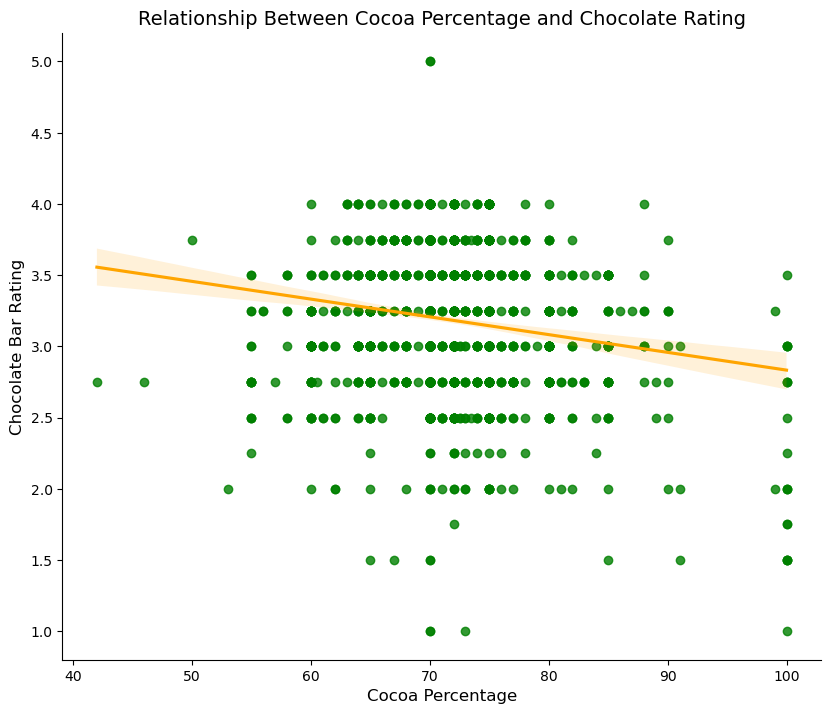

In [25]:
# Seaborn Scatterplot of rating and cocoa percentage to show correlation
scat_plot= sns.lmplot(x='Cocoa_Percentage', #x-axis column
    y= 'Rating', #y-axis column
    data = df, #dataframe used
    height=7,  # Set the plot size
    aspect=1.2,  # Adjust the aspect ratio
    scatter_kws={'color': 'green'},  # Customize scatter points
    line_kws={'color': 'orange'} # Customize regression line
                      )

#Chart Titles and Labels
plt.title('Relationship Between Cocoa Percentage and Chocolate Rating', fontsize =14) #Chart title
plt.xlabel('Cocoa Percentage', fontsize = 12)  #X-Axis Label
plt.ylabel('Chocolate Bar Rating', fontsize =12)  #Y-Axis Label

#Save Scatterplot
scat_plot.savefig(os.path.join(path, '04-Analysis','Data Visualizations','seaborn_scatterplot.png'), 
                               dpi=300,    #higher quality image save
                               bbox_inches = 'tight'  #Fits whole image
                 )

### Scatterplot Analysis:

#### - We can see a slight (weak) negative correltaion between cocoa percentage and chocolate bar ratings
#### - From the graphic we can see that the lower the chocolate bar ratings go, there are higher cocoa percentages incolved
#### - Overall, many of the datapoints are not close to the line, meaning the relationship is weak

## -

### Pair Plot using Seaborn

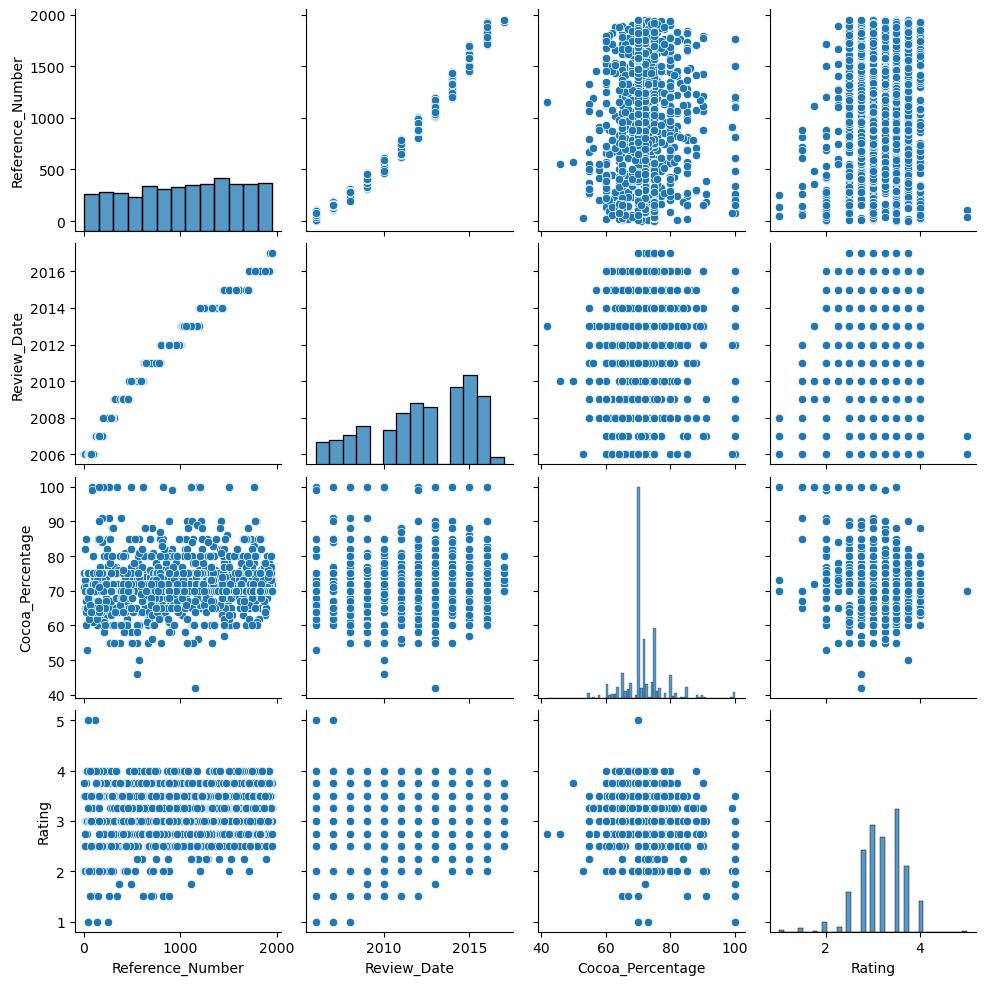

In [26]:
#Pair plot using subset dataframe
pair_plot = sns.pairplot(df_selected)

#Save Pair Plot
pair_plot.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations', 'seaborn_pairplot.png'),
                  dpi=300,
                  bbox_inches = 'tight'
                 )

### Pair Plot Analysis:

- We can see there are more lower ratings before the year 2012. This could mean the experts developed a better palatte for the chocolates over time, or the chocolate makers developed better chocolates
- We can also see a relatively even distribution of all chocolate cocoa percentages over the years. Most percentages of cocoa do fall within 60-80%.
- There is a normal bell curve for all rating scores as well. Most ratings fall between 2 and 4, and there are few low score below 2 as well as a few high ratings above 4, we can create a histogram in the next step to see the distribution of ratings

## -

### Categorical Plots:

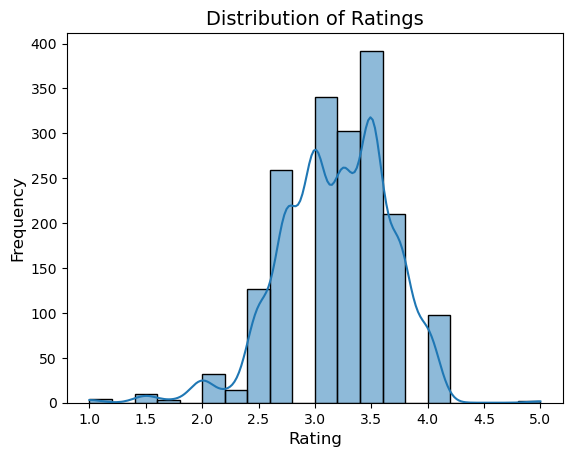

In [27]:
#Histogram of Ratings
sns.histplot(df['Rating'], bins =20, kde = True)  #kde argument addsa a line for distribution

#Add titles
plt.title('Distribution of Ratings', fontsize = 14)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Frequency', fontsize =12)

#Save image of histogram
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations','seaborn_ratings_histogram.png'),
                     dpi = 300,
                     bbox_inches = 'tight'
                    )

In [28]:
#Create 'Flavor Rating' Definition, for additional Visualization filter
df.loc[df['Rating'] <= 2.0, 'Flavor_Rating'] = 'Unpleasant'
df.loc[(df['Rating'] > 2.0) & (df['Rating'] <= 2.50), 'Flavor_Rating'] = 'Disappointing'
df.loc[(df['Rating'] > 2.50) & (df['Rating'] <= 3.50), 'Flavor_Rating'] = 'Satisfactory'
df.loc[(df['Rating'] > 3.50) & (df['Rating'] < 4.0), 'Flavor_Rating'] = 'Praiseworthy'
df.loc[(df['Rating'] >= 4.0) & (df['Rating'] <= 4.5), 'Flavor_Rating'] = 'Premium'
df.loc[df['Rating'] > 4.5, 'Flavor_Rating'] = 'Elite'

In [29]:
#Check new 'Flavor Rating' counts
df['Flavor_Rating'].value_counts(dropna = False)

Flavor_Rating
Satisfactory     1295
Praiseworthy      210
Disappointing     141
Premium            98
Unpleasant         49
Elite               2
Name: count, dtype: int64

In [30]:
df.columns

Index(['Company', 'Bar_Name', 'Reference_Number', 'Review_Date',
       'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type',
       'Bean_Origin', 'Flavor_Rating'],
      dtype='object')

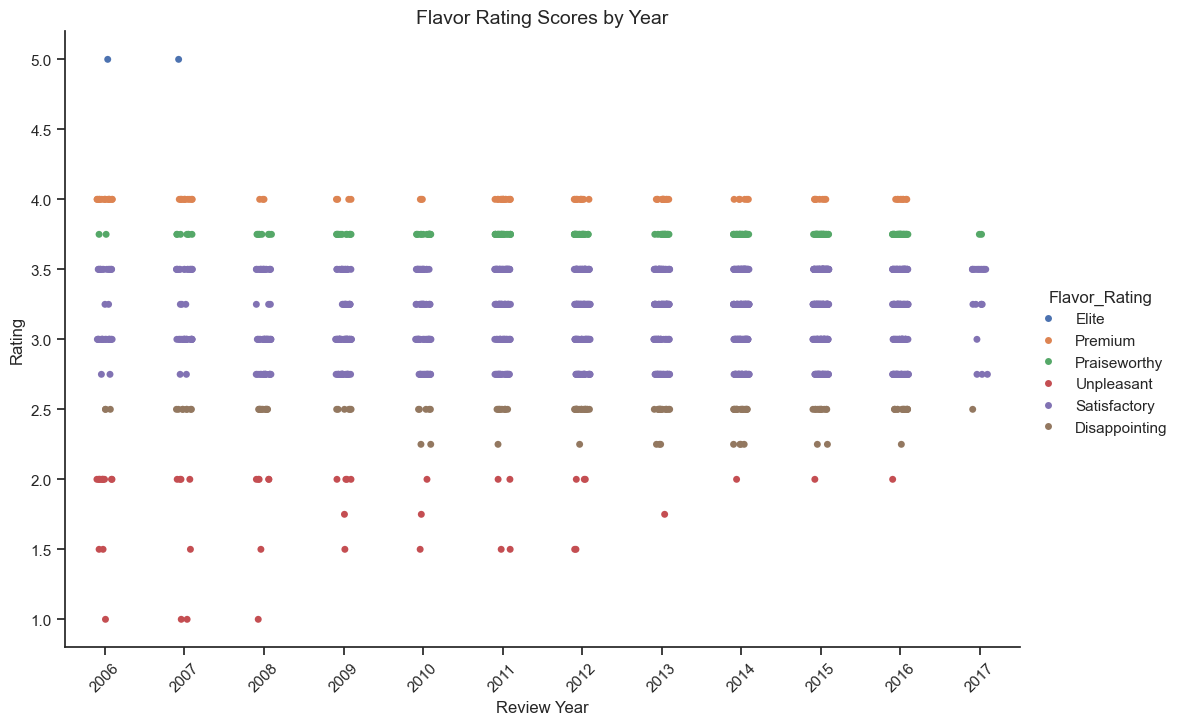

In [31]:
#Create Categorical Plot to show distribution of Flavor_Ratings
sns.set(style = 'ticks')
g = sns.catplot(x = 'Review_Date', 
                y = 'Rating', 
                hue = 'Flavor_Rating', 
                data = df,
                height = 7,
                aspect = 1.5
               )
#Adjust Labels and Axis Ticks
plt.xticks(rotation=45)
plt.xlabel('Review Year', fontsize =12)
plt.ylabel('Rating', fontsize =12)
plt.title('Flavor Rating Scores by Year', fontsize =14)

#Save Image
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations','seaborn_catplot.png'),
                     dpi = 300,
                     bbox_inches = 'tight'
                    )

## Categorical Plot Analysis:

- The year's 2006-2008 were the only years to produce the extreme results of taste (Unpleasant and ELite)
- As the years went on, ratings seem to level out and most score produced fall under the 'Satisfactory' classification
- Ratings tend to do better overall after the year 2012

## -

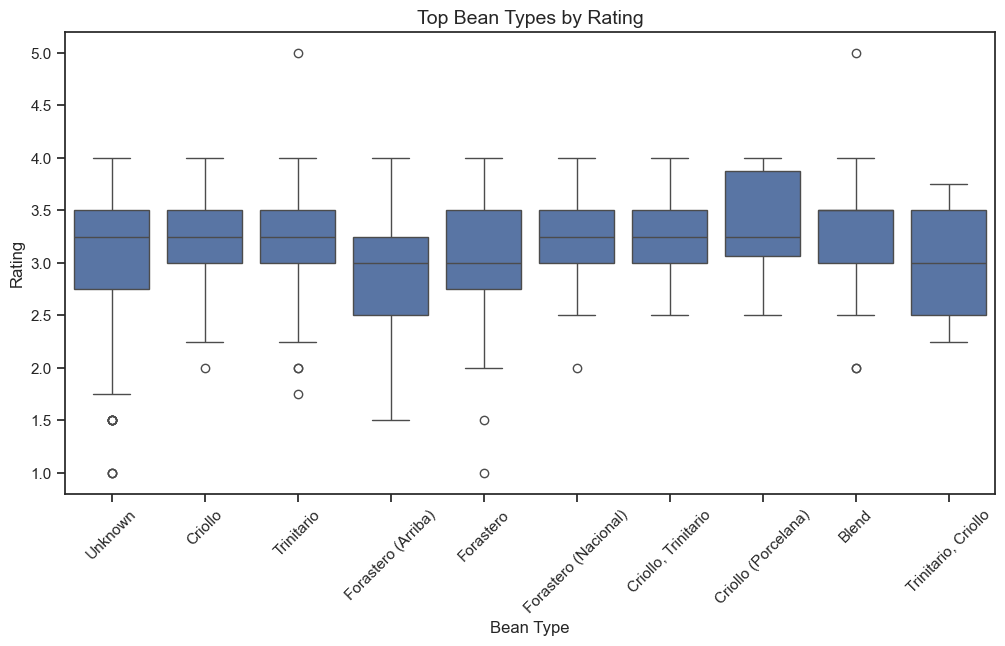

In [32]:
# Categorical Box Plot: Rating by Bean Type (top 10)
plt.figure(figsize=(12, 6))
top_10_beans = df['Bean_Type'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Bean_Type'].isin(top_10_beans)],
            x='Bean_Type', 
            y='Rating'
           )

#Add Title and Axis
plt.xticks(rotation=45)
plt.xlabel('Bean Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Top Bean Types by Rating', fontsize=14)

#Save Image
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations','seaborn_boxplot.png'),
                     dpi = 300,
                     bbox_inches = 'tight'
                    )

### BoxPLot Analysis:

- Unknown and Forastero(Arriba) Bean Types show the widest spread of Ratings
- Criollo and Trinitario show highger meidan Ratings tha other Bean Types
- Trinitario and Blend Bean Types are the only beans to produce the highgest rating (5 - Elite)

## -

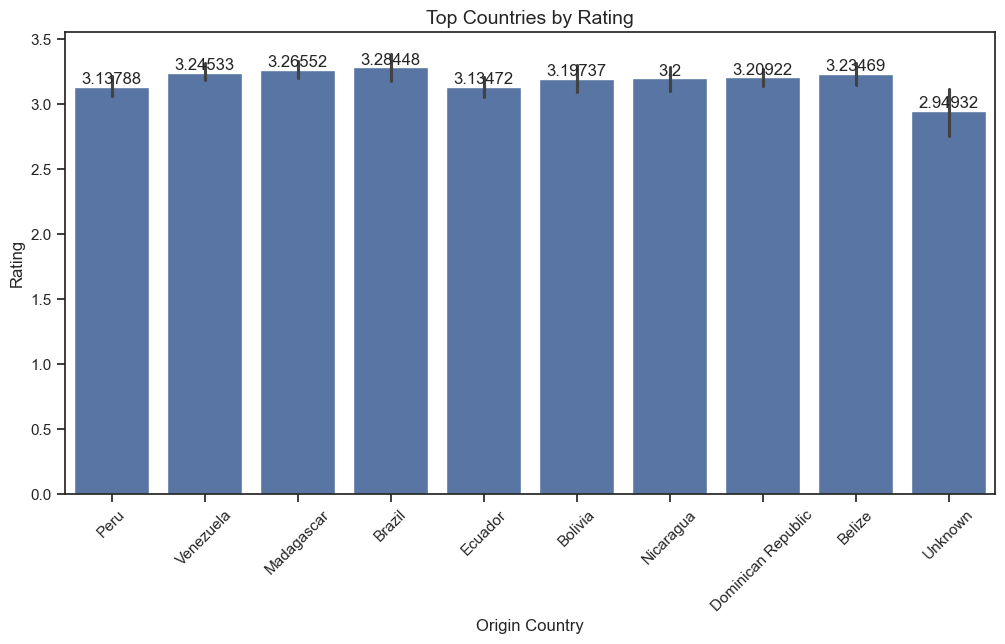

In [33]:
# Categorical Box Plot: Rating by Bean Type (top 10)
plt.figure(figsize=(12, 6))
top_10_countries = df['Bean_Origin'].value_counts().nlargest(10).index
ax = sns.barplot(data=df[df['Bean_Origin'].isin(top_10_countries)],
            x='Bean_Origin', 
            y='Rating',
            )

#Add Title and Axis
plt.xticks(rotation=45)
plt.xlabel('Origin Country', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Top Countries by Rating', fontsize=14)
ax.bar_label(ax.containers[0])
#Save Image
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations','seaborn_top_countries.png'),
                     dpi = 300,
                     bbox_inches = 'tight'
                    )

### Bar Plot Analysis:

- Brazil, Madagascar, and Venezuela are the countries that produce the highgest ratings of beans
- With the exception of Madagascar, we can see the Western Hemisphere of the globe produces the best cocoa beans

## -

## 4. Answer Research Questions and Hypothesis

1. Is there a correlation between cacao percentage and rating?
    - There is a small negative relationship between cacao percentage and rating. As cacao percentages increase, ratings on chocolate bars tend to decrease

2. How have ratings changed over the years, is there a trend?
   - Ratings for chocolate bars have gotten more consistent after many years of reviews. There is a smaller discrepency of scores after 2012, and most ratings fall under the 'Satisfactory' calssification
   - 2006-2008 were the only years to produce 'Elite' level tasting, so the early years of cocao ratings were still being refined
   - There were also fewer 'Unpleasant' scores after 2012, so chocolate could have been improving over the years

3. Which bean types have the best ratings?
    - Criollo and Tentario show the most promise in terms of median rating scores
    - Forastero and Foraster(arriba) bean types have a wide range of outcomes nad show lower median ratings.

4. Are there specific regions or countries that produce the best cocoa beans?
   - Madagascar, Brazil, and Venezuela produce the best ratings for cacao beans
   - 9 of the top 10 countries with the best ratings are in the Western Hemisphere, primarily in central America and the northern part of South America

### Hypothesis:

1. If a bean has a higher percentage of cocoa, then the ratings will be lower for that chocolate bar
2. If the bean type used for a chocolate bar is Criollo or Trinitario, then it will produce a better tasting chocolate bar
3. If the bean type used for a chocolate bar is Forastero, then it will produce a worse tasing chocolate bar, even mor elikley an Unpleasant one
4. If the Bean origin is located somewhere in the western hemisphere of the globe, then it will produce a better tasting chocolate bar

## -

### Export Latest/Cleaned Dataset

In [34]:
#Export as cvs
df.to_csv(os.path.join(path, '02-Data', 'Prepared Data Files', 'flavors_of_cacao_cleaned_v2.csv'))